In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

ImportError: To use Keras, you need to have `optree` installed. Install it via `pip install optree`

In [2]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images to have a single channel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
# Define class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:

# Display the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)



Epoch 1/20
1500/1500 [==============================] - 40s 24ms/step - loss: 0.5344 - accuracy: 0.8017 - val_loss: 0.3919 - val_accuracy: 0.8542
Epoch 2/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.3400 - accuracy: 0.8771 - val_loss: 0.3368 - val_accuracy: 0.8743
Epoch 3/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2912 - accuracy: 0.8925 - val_loss: 0.2954 - val_accuracy: 0.8902
Epoch 4/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2580 - accuracy: 0.9052 - val_loss: 0.2800 - val_accuracy: 0.8989
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2355 - accuracy: 0.9126 - val_loss: 0.2806 - val_accuracy: 0.8973
Epoch 6/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2151 - accuracy: 0.9209 - val_loss: 0.2868 - val_accuracy: 0.8943
Epoch 7/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1946 - accuracy: 0.9278 - val_loss: 0.2826 -

In [8]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")



313/313 [==============================] - 2s 4ms/step - loss: 0.4501 - accuracy: 0.9041
Test Accuracy: 0.9041000008583069


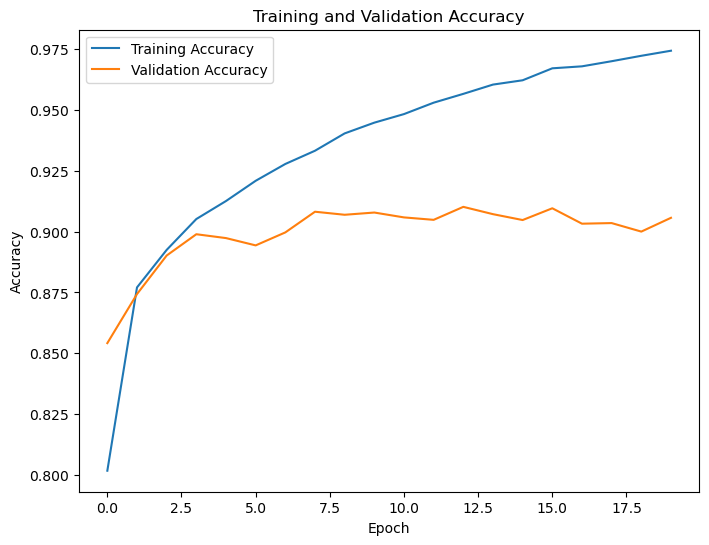

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

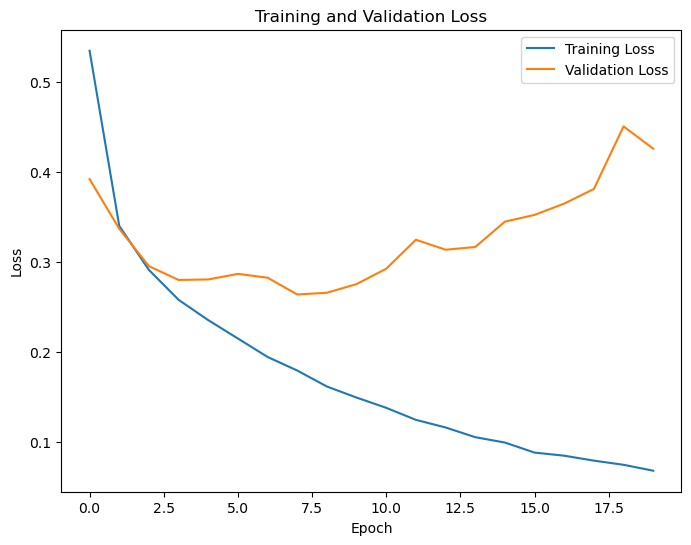

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


313/313 [==============================] - 1s 5ms/step


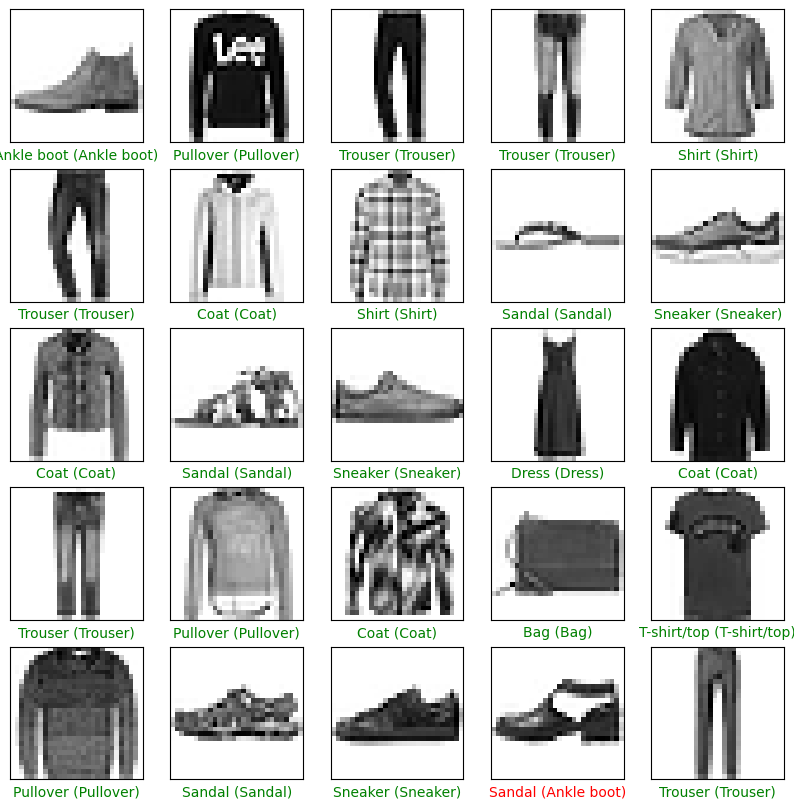

In [19]:
# Make predictions
predictions = model.predict(test_images)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()